In [258]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import copy
import math

In [ ]:
# upload and transform the dataset
def load_data(filename):
    data = np.loadtxt(filename, dtype=str, delimiter=",")
    X = data[:,2:]
    y = data[:,1]
    return X, y

# load dataset
X, y = load_data("./data/wdbc.data")

# convert data from chars to floats
X_train = np.array(X).astype(float)

# convert diagnoses to their respective numerical values
y_train = np.empty(y.shape)
for i in range(len(y)):
    if y[i] == 'M':
        y_train[i] = 1
    else:
        y_train[i] = 0

In [ ]:
# scale the dataset using z-score normalization
def zscore_normalize_features(X):
    """
    Computes X, z-score normalized by column
    Args:
      X : (ndarray (m,n)) input data, m examples, n features
    Returns:
      X_norm : (ndarray (m,n)) input normalized by column
      mu : (ndarray (n,)) mean of each feature
      sigma : (ndarray (n,)) standard deviation of each feature
    """
    # find mean of each column/feature
    mu = np.mean(X,axis=0)
    # find standard deviation of each column/feature
    sigma = np.std(X,axis=0)
    X_norm = (X - mu) / sigma    
    return (X_norm, mu, sigma)

# normalize the raw data
X_train, mu, sigma = zscore_normalize_features(X_train)

In [ ]:
# implement regularization
def sigmoid(z):
    """
    Compute the sigmoid of z
    Args:
        z : (ndarray) a scalar, numpy array of any size
    Returns:
        g : (ndarray) sigmoid(z), with the same shape as z
    """
    g = 1 / (1 + np.exp(-z))
    return g

def compute_cost(X, y, w, b, lambda_=1):
    """
    Computes the cost over all examples
    Args:
      X : (ndarray Shape (m,n)) data, m examples by n features
      y : (array_like Shape (m,)) target value
      w : (array_like Shape (n,)) values of parameters of the model
      b : (scalar) values of bias parameter of the model
      lambda_ : unused placeholder
    Returns:
      total_cost : (scalar) cost
    """
    m, n = X.shape
    loss = 0
    for i in range(0,m):
      z = np.dot(w,X[i]) + b
      f = sigmoid(z)
      loss += -y[i] * np.log(f) - (1 - y[i]) * np.log(1 - f)
    cost = loss / m
    regCost = 0
    for j in range(0,n):
      regCost += pow(w[j],2)
    regCost *= lambda_ / (2 * m)
    total_cost = cost + regCost
    return total_cost

def compute_gradient(X, y, w, b, lambda_=None):
    """
    Computes the gradient for logistic regression
    Args:
      X : (ndarray Shape (m,n)) variable such as house size
      y : (array_like Shape (m,1)) actual value
      w : (array_like Shape (n,1)) values of parameters of the model   
      b : (scalar) value of parameter of the model
      lambda_ : unused placeholder
    Returns
      dj_db : (scalar) the gradient of the cost w.r.t. the parameter b
      dj_dw : (array_like Shape (n,1)) the gradient of the cost w.r.t. the parameters w
    """
    m, n = X.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(0,m):
      tmp = sigmoid((np.dot(w,X[i]) + b)) - y[i]
      dj_db += tmp
      for j in range(0,n):
        dj_dw[j] += tmp * X[i,j]
    dj_db /= m
    dj_dw /= m
    return dj_db, dj_dw

def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters, lambda_): 
    """
    Performs batch gradient descent to learn theta. Updates theta by taking num_iters gradient steps with learning rate alpha
    Args:
      X : (array_like Shape (m,n))
      y : (array_like Shape (m,))
      w_in : (array_like Shape (n,)) initial values of parameters of the model
      b_in : (scalar) initial value of parameter of the model
      cost_function : function to compute cost
      alpha : (float) learning rate
      num_iters : (int) number of iterations to run gradient descent
      lambda_ : (scalar, float) regularization constant
    Returns:
      w (array_like Shape (n,)) : updated values of parameters of the model after running gradient descent
      b (scalar) : updated value of parameter of the model after running gradient descent
    """
    m = len(X)
    J_history = []
    w_history = []
    for i in range(num_iters):
        dj_db, dj_dw = gradient_function(X, y, w_in, b_in)   
        w_in += -alpha * dj_dw
        b_in += -alpha * dj_db
        if i < 100000:
            cost = cost_function(X, y, w_in, b_in, lambda_)
            J_history.append(cost)
        if i% math.ceil(num_iters / 10) == 0 or i == (num_iters - 1):
            w_history.append(w_in)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")
    return w_in, b_in, J_history, w_history

# declare parameters
w = np.zeros(30)
b = 0
alpha = 0.01
iterations = 4000

# learn parameters
w, b, J_history, w_history = gradient_descent(X_train, y_train, w, b, compute_cost, compute_gradient, alpha, iterations, 0)

Iteration    0: Cost     0.67   
Iteration  400: Cost     0.14   
Iteration  800: Cost     0.11   
Iteration 1200: Cost     0.10   
Iteration 1600: Cost     0.09   
Iteration 2000: Cost     0.08   
Iteration 2400: Cost     0.08   
Iteration 2800: Cost     0.08   
Iteration 3200: Cost     0.08   
Iteration 3600: Cost     0.07   
Iteration 3999: Cost     0.07   


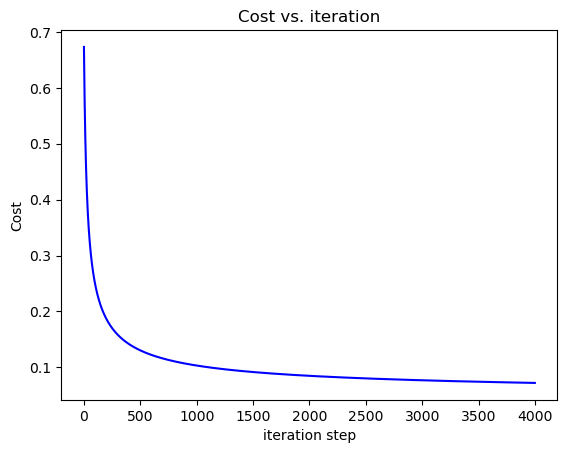

In [ ]:
# plot the learning curve
def plot_cost_versus_iteration(history):
    plt.plot(J_history, c='b', label='Cost')
    plt.title("Cost vs. iteration"); 
    plt.ylabel('Cost');  
    plt.xlabel('iteration step');  
    plt.show()

plot_cost_versus_iteration(J_history)

In [ ]:
# adjust relevant parameters to get accuracy rate >=95%
def predict(X, w, b): 
    """
    Predict whether the label is 0 or 1 using learned logistic regression parameters w
    Args:
        X : (ndarray Shape (m,n))
        w : (array_like Shape (n,)) parameters of the model
        b : (scalar, float) parameter of the model
    Returns:
        p : (ndarray (m,1))
        The predictions for X using a threshold at 0.5
    """
    m, n = X.shape   
    p = np.zeros(m)
    for i in range(0,m):
        f = sigmoid(np.dot(w,X[i]) + b)
        if f >= 0.5:
            p[i] = 1
        else:
            p[i] = 0
    return p

# compute accuracy
p = predict(X_train, w, b)
print('Train Accuracy: %f'%(np.mean(p==y_train) * 100))

Train Accuracy: 98.594025
